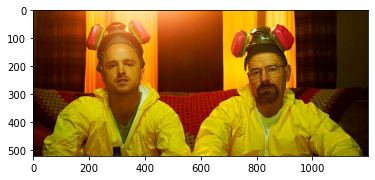

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.image as mpimg
from sklearn.cluster import KMeans
img=mpimg.imread("breaking-bad-1.jpg")
plt.imshow(img)

In [11]:
img.shape

(522, 1200, 3)

In [12]:
data=np.reshape(img,(522*1200,3))
import pandas as pd 
df=pd.DataFrame(data)
df

,0,1,2
0,96,43,0
1,96,43,0
2,96,43,0
3,96,43,0
4,96,43,0
...,...,...,...
626395,13,2,0
626396,14,3,1
626397,14,4,2
626398,14,4,2


In [13]:
a = []
for cluster in range(1,11):
    kmeans = KMeans(n_clusters = cluster, init="k-means++", random_state=10)
    kmeans.fit(df)
    a.append(kmeans.inertia_)

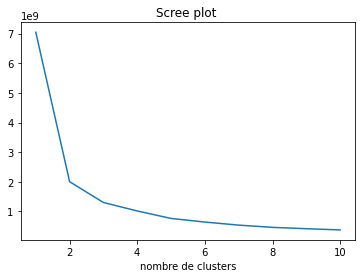

In [14]:
plt.plot(range(1,11), a)
plt.title('Scree plot ')
plt.xlabel('nombre de clusters')
plt.show()

In [24]:
kmeans=KMeans(n_clusters=3,init="k-means++",max_iter=300,n_init=10,random_state=0)
kmeans.fit(df)
kmeans.labels_

array([0, 0, 0, ..., 0, 0, 0])

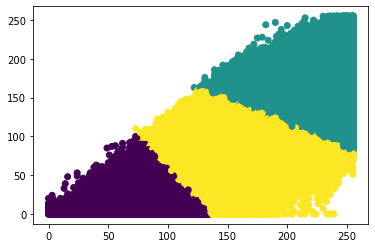

In [25]:
k=pd.DataFrame(kmeans.labels_)
cluster=np.concatenate((df,k),axis=1)
plt.scatter(cluster[:,0],cluster[:,1],c=kmeans.labels_);

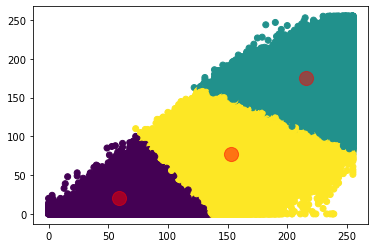

In [26]:
centers = kmeans.cluster_centers_
plt.scatter(cluster[:,0],cluster[:,1],c=kmeans.labels_)
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.5);

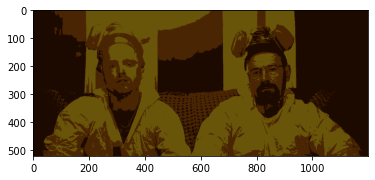

In [35]:
imgq=np.zeros((522*1200,3))
for i in range(0,522*1200):
    imgq[i]=centers[kmeans.labels_[i]]
    
res=imgq.reshape([522,1200,3])
plt.imshow(img)
plt.imshow(res/522);

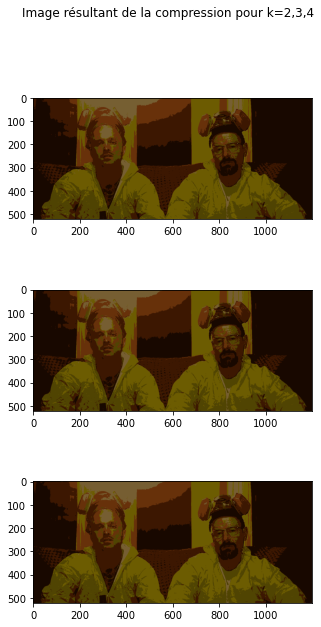

In [16]:
fig, axs = plt.subplots(3,1,figsize=(5,10))
fig.suptitle('Image résultant de la compression pour k=2,3,4')


for K in np.arange(4,7):
    for i in np.arange(3):
        kmeans =KMeans(n_clusters=K,init='k-means++')
        kmeans.fit(df)
        res=kmeans.cluster_centers_[kmeans.labels_]
        res = np.reshape(res,(522,1200,3))
        axs[i].imshow(res/522)